

#**1. The 'Adult' dataset**:
Importing the data:



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer

#opening the adult dataset
# Note: header=None prevents that the first entry is automatically registered as the column names
df=pd.read_csv(r'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)

#Manually inserting what each column represents (according to adult.names file)
df.columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

# df.head()

In [ ]:
#Divide data into input (X) and outcome (y)
X=df.drop('income',1)
y=[0 if i== ' <=50K' else 1 for i in df['income']]

#**Data Analysis and Preprocessing**



In [ ]:
#Divide data into input (X) and outcome (y)
X=df.drop('income',1)
y=[0 if i== ' <=50K' else 1 for i in df['income']]

In [ ]:
# Creating a list of columns with categorical data and a list with numerical data:
def object_cols(df):
    return list(df.select_dtypes(include='object').columns)

def numerical_cols(df):
    return list(df.select_dtypes(exclude='object').columns)

obj_c = object_cols(df)
num_c = numerical_cols(df)

In [ ]:
#Analysing the dataset
num_c

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

**NUMERICAL FEATURES**

The following preprocessing options were tested on the data, and the one which transformed the data to fit most a normal distribution was also applied.

>StandardScaler: Standardize features by removing the mean and scaling to unit variance; cannot guarantee balanced feature scales in the presence of outliers.


>RobustScaler: removes the median and scales the data according to the quantile range, robust to outliers

>PowerTransformer: Apply a power transform featurewise to make data more Gaussian-like.  This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired. The optimal parameter for stabilizing variance and minimizing skewness is estimated through maximum likelihood. By default, zero-mean, unit-variance normalization is applied.
>>Box-Cox transform: requires input data to be strictly positive. Default (for λ=0) Box-Cox is the logarithmic function.\
>>Yeo-Johnson transform (default): supports both positive or negative data.

For heavily right skewd data (columns capital-gain and capital-loss) the following transformations were also tested: \
>square root \
>log (unpractical if there are values equal to zero; solution: add a very small constant c=0.1) \
>sinh 

None of these transformations resulted in a satisfactory data, thus capital-gain and capital-loss have been merged into net-capital,which resembled more a normal distribution.


In [ ]:
#A function used to describing data
def describe (data):
  print ('Characteristics:\nmean {} \nmedian {} \nskewness {} \nstand. deviation {}'.format(np.mean(data), np.median(data), scipy.stats.skew(data), np.std(data)))




#################################################################################################
#Function 'trans' applies the above mentioned transformations of the data and shows a visualisation of the result.
# The visualisations have been commented out after the appropiate transformation was chosen for each feature.
def transf (data):
  t = np.asarray(data)
  t = t.reshape(-1,1)

  #Standard
  tss=StandardScaler().fit_transform(t)
  print ('Standard Scaler:')
  describe(tss)
  #sns.histplot(data=tss).set(title = 'Standard')
  #plt.show()
  
  #Robust 
  trs=RobustScaler().fit_transform(t)
  print ('\nRobust Scaler:')
  describe(trs)
  #sns.histplot(data=trs).set(title = 'Robust')
  #plt.show()

  #Boxcox 
  if (np.min(data)>0):
    tboxcox=PowerTransformer(method='box-cox').fit_transform(t)
    print ('\nBox-Cox Transformation:')
    describe(tboxcox)
    #sns.histplot(data=tboxcox).set(title = 'Box-Cox')
    #plt.show()
  else: 
    print('\nBox-Cox cannot be performed (data is not strictly positive)\n\n')
    tboxcox=0

  #Yeo-Johnson
  tyeojohn=PowerTransformer(method='yeo-johnson').fit_transform(t)
  print ('\nYeo-Johnson Transformation:')
  describe(tyeojohn)
  #sns.histplot(tyeojohn).set(title = 'Yeo-Johnson') #COMMENT: for this data the output is similar to Box-Cox
  #plt.show()

  return (tss, trs, tboxcox,tyeojohn)
#
#
#
#
#
#
###############################################################################################
def yeojohn(data):  #only the yeojohn transformation; 
  t = np.asarray(data)
  t = t.reshape(-1,1)
  tyeojohn=PowerTransformer(method='yeo-johnson').fit_transform(t)
  return tyeojohn



#
#
#
#
#
#################################################################################################################
def hrskew(data):  ##all transformations that have been tested on the features with a very proeminent right skew
  #Square Root (only non-negative data)
  if np.min(data)>=0:
    tsqrt=np.sqrt(data)
    print ('Square Root Transformation:\n mean {} \nmedian {} \nskewness {}'.format(np.mean(tsqrt), np.median(tsqrt), scipy.stats.skew(tsqrt)))
    sns.histplot(tsqrt).set(title = 'Square Root')
    plt.show()
  else:
    print ('Square root not possible due to negative values')
    tsqrt=0

  #Logarithmic function (only strictly positive data)
  if np.min(data)>0:
    tlog=np.log(data)
    print ('Log Transformation:\n mean {} \nmedian {} \nskewness {}'.format(np.mean(tlog), np.median(tlog), scipy.stats.skew(tlog)))
    sns.histplot(tlog).set(title = 'Logarithmic')
    plt.show()
  else:
    print ('SLogarithmic transformation not possible due to negative values or zeros')
    tlog=0

  #Logarithmic function plus constant (to avoid zeros)
  c=0.1
  if np.min(data)+c>0:
    tlog2=np.log(data+c)
    print ('Log(data+0.1):\n mean {} \nmedian {} \nskewness {}'.format(np.mean(tlog2), np.median(tlog2), scipy.stats.skew(tlog2)))
    sns.histplot(tlog2).set(title = 'Logarithmic with constant')
    plt.show()
  else:
    print ('Logarithmic transformation (plus constant) not possible due to negative values')
    tlog2=0

  #Sinh transformation (overflow for big values, since it implies e^x)
  if np.max(data)<=40:
    tsinh=np.sinh(data)
    print ('Hyperbolic Sine Transformation:\n mean {} \nmedian {} \nskewness {}'.format(np.mean(tsinh), np.median(tsinh), scipy.stats.skew(tsinh)))
    sns.histplot(tsinh).set(title = 'Hyperbolic sine')
    plt.show()
  else:
    print ('Sinh function not possible, data too large')
    tsinh=0

  return (tsqrt, tlog, tlog2, tsinh)




####################################################################################
  def percentage (data): #used to calculate the distribution of the income in relation to certain features
    return len(data[data.income==' >50K'])/len(data)


>>**Feature: AGE**

Characteristics:
mean 38.58164675532078 
median 37.0 
skewness 0.5587176292398571 
stand. deviation 13.640223092304081


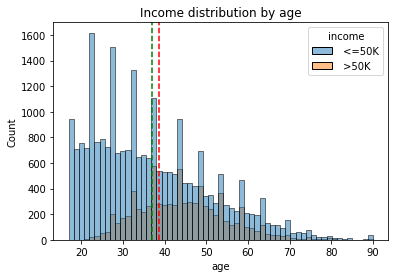

In [ ]:
describe (df.age)  #skewness accepted for this project: max 0.8

sns.histplot(data=df, x='age', hue='income').set(title = 'Income distribution by age')

plt.axvline(df['age'].mean(), color='r', linestyle='--')
plt.axvline(df['age'].median(), color='g', linestyle='--')
#plt.axvline(df['age'].mode(), color='b', linestyle='-')
#plt.hist(df['age'])
plt.show()

Standard Scaler:
Characteristics:
mean -2.7059150282317012e-17 
median -0.11595461046477588 
skewness [0.55871763] 
stand. deviation 1.0

Robust Scaler:
Characteristics:
mean 0.07908233776603912 
median 0.0 
skewness [0.55871763] 
stand. deviation 0.6820111546152138

Box-Cox Transformation:
Characteristics:
mean -2.2714410910374013e-15 
median 0.02859890439374671 
skewness [-0.01612141] 
stand. deviation 1.0

Yeo-Johnson Transformation:
Characteristics:
mean 1.5275326772275733e-16 
median 0.028013720487216634 
skewness [-0.01389758] 
stand. deviation 1.0


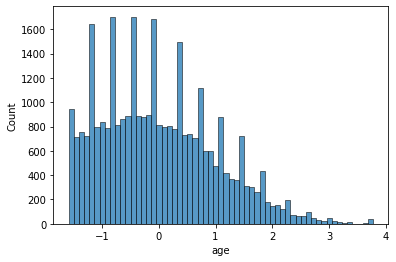

In [ ]:
###Transformation of age data

agess, agers, ageboxcox, ageyeojohn = transf(df.age) 

#Selected transformation: Standard Scaler

X.age=agess
sns.histplot(data=X.age)

>>**Feature: FNLWGT**

In [ ]:
#FNLWGT

# this is the number of people the census believes the entry represents
# no real informational value
# no need to be used
del X['fnlwgt']

>>**Feature: CAPITAL-GAIN**






Characteristics:
mean 1077.6488437087312 
median 0.0 
skewness 11.953296998194332 
stand. deviation 7385.178676946586


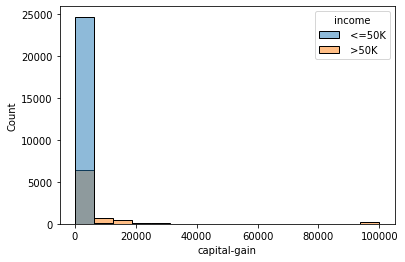

In [ ]:
describe(df['capital-gain'])

#describe(df['capital-gain']-df['capital-loss'])
sns.histplot(data=df, x='capital-gain', hue='income')
plt.show()

In [ ]:
#Transformation of Capital-Gain

#cg_tss, cg_trs, cg_boxcox, cg_yeojohn = transf(df['capital-gain'])

In [ ]:
#None of the previous transformations reduce the skew to an acceptable value (below 0.5)

#cg_sqrt, cg_log, cg_log2, cg_sinh=hrskew(df['capital-gain'])

>>**Feature: CAPITAL-LOSS**


Characteristics:
mean 87.303829734959 
median 0.0 
skewness 4.59441745643977 
stand. deviation 402.9540308275458


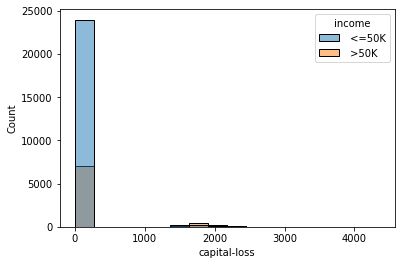

In [ ]:
describe(df['capital-loss'])
# using a logarithmic scale
capl_plot = sns.histplot(data=df, x='capital-loss', hue='income')
#capl_plot.set_yscale('log')

In [ ]:
#Transformation of Capital-Loss
#cl_tss, cl_trs, cl_boxcox, cl_yeojohn = transf(df['capital-loss'])


In [ ]:
# Due to high right skewness, we also apply sqroot, log and sinh
#cl_sqrt, cl_log, cl_log2, cl_sinh=hrskew(df['capital-loss'])

Due to the high right skewness of features 'capitaal-gain' and 'capital-loss', which could not be corrected even after all the above mencioned transformation, these features were deemed unusable for our classifiers. Nontheless, we merged them (by substraction) into a new feature 'net-capital' which, after undergoing a yeo-johnson transformation, was selected to be further used, as it fits a normal distribution.

In [ ]:
#Capital0gain and Capital-loss cannot be user per se in the classification.
#Creating a new feature:

df['net-capital']=df['capital-gain']-df['capital-loss']
describe(df['net-capital'])
#nc_ss, nc_rs, nc_boxcox, nc_yeojohn=transf(df['net-capital'])
#nc_sqrt, nc_log, nc_log2, nc_sinh=hrskew(df['net-capital'])

Characteristics:
mean 990.3450139737723 
median 0.0 
skewness 11.87138700308005 
stand. deviation 7408.8731790828


Characteristics:
mean -8.748056894320749e-16 
median 0.04477222863299982 
skewness 0.798720544761661 
stand. deviation 1.0000000000001912


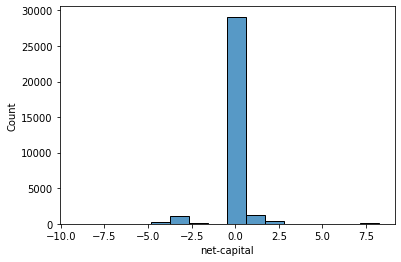

In [ ]:
del X['capital-gain']
del X['capital-loss']
X['net-capital']=yeojohn(df['net-capital'])
describe (X['net-capital'])
sns.histplot(data=X['net-capital'])

>>**Feature: Hours per week**



Characteristics:
mean 40.437455852092995 
median 40.0 
skewness 0.227632049774777 
stand. deviation 12.347239075706955


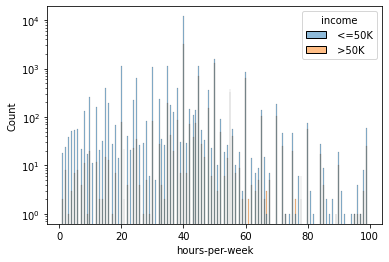

In [ ]:
describe(df['hours-per-week'])
sns.histplot(data=df, x='hours-per-week', hue='income').set_yscale('log')
plt.show()

In [ ]:
from scipy.stats import kurtosis #since the data has (visually) a very sharp peak, we are interested in its kurtosis
print('Kurtosis is: ', kurtosis(df['hours-per-week']), 'thus the data is mesokurtic.\n Skewness<1. \n This data is sufficiently similar to a gaussian distribution and thus does not need a transformation.')
print('The range of values within the data is:', np.max(df['hours-per-week'])-np.min(df['hours-per-week']), 'needs scaling.')

hpw_ss, hpw_rs, hpw_bpxcpx, hpw_yeojohn=transf(df['hours-per-week'])

X['hours-per-week']=hpw_ss

Kurtosis is:  2.9160546709844883 thus the data is mesokurtic.
 Skewness<1. 
 This data is sufficiently similar to a gaussian distribution and thus does not need a transformation.
The range of values within the data is: 98 needs scaling.
Standard Scaler:
Characteristics:
mean -1.5493545726165386e-17 
median -0.03542944697277691 
skewness [0.22763205] 
stand. deviation 0.9999999999999999

Robust Scaler:
Characteristics:
mean 0.08749117041859895 
median 0.0 
skewness [0.22763205] 
stand. deviation 2.4694478151415975

Box-Cox Transformation:
Characteristics:
mean -4.720075972633201e-16 
median -0.03568063895386623 
skewness [0.23107916] 
stand. deviation 1.0

Yeo-Johnson Transformation:
Characteristics:
mean -9.994428088146123e-17 
median -0.035570102812165307 
skewness [0.22956106] 
stand. deviation 1.0


**CATEGORICAL FEATURES**

Goals:
*   One-Hot-Encoder for all categorical features selected
*   Reduction of features by merging categories into logical subgroups




In [ ]:
#Deciding which data to use in the model
for i in obj_c:
  unique=len(df[i].unique())
  print ('Feature {feature}'.format(feature=i), 'has %u unique categories' %(unique))

Feature workclass has 9 unique categories
Feature education has 16 unique categories
Feature marital-status has 7 unique categories
Feature occupation has 15 unique categories
Feature relationship has 6 unique categories
Feature race has 5 unique categories
Feature sex has 2 unique categories
Feature native-country has 42 unique categories
Feature income has 2 unique categories


>>**Feature: WORKCLASS**

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

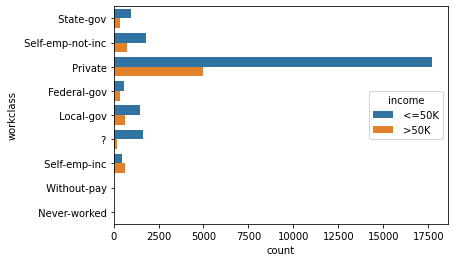

In [ ]:
# Analysing feature workclass

cp = sns.countplot(data=df, y='workclass', hue='income')
#cp.set_xticklabels(cp.get_xticklabels(), rotation=30)  # make x axis labels readable, location of labels isn't perfect though #alternative: plot on y axis
df.workclass.value_counts()

After feature selection:
---------------------



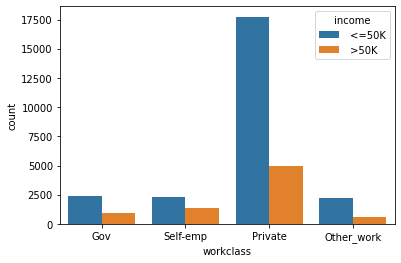

In [ ]:
#Separating feature 'workclass' into 4 categories:
#
#'Private','Gov', 'Self-employed and 'Other'
#
X['workclass']=['Private' if (i == ' Private')
else 'Self-emp' if (i== ' Self-emp-inc' or i== ' Self-emp-not-inc') 
else 'Gov' if (i == ' Local-gov' or i== ' State-gov' or i== 'Federal-gov') 
else 'Other_work' for i in df['workclass']]

#df1['work']=['State' if (i == ' Local-gov' or i== ' State-gov' or i== 'Federal-gov') else 'Other' for i in df['workclass']]
#df['workclass'].replace(to_replace=' Self-emp-inc', value='0')

dummy=pd.get_dummies(X.workclass)
X=pd.concat([X, dummy], axis=1)
print ('After feature selection:\n---------------------\n')
cp = sns.countplot(data=X, x='workclass', hue=df.income)
X.workclass.value_counts()
del X['workclass']

>>**Feature: EDUCATION**

In [ ]:
# Analysing feature education - commented out, since education-num can be used instead
del X['education']

>>**Feature: EDUCATION-NUM**


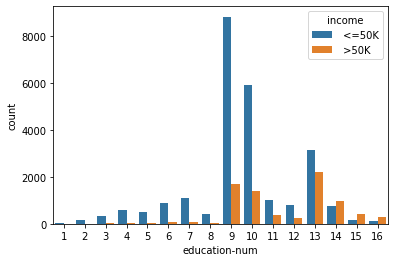

In [ ]:
# education-num is just the nominal variable education converted to numbers instead of text, thus it shall be treated as an ordinal categorical value
edu_plot = sns.countplot(data=df, x='education-num', hue='income')#.set(title = 'Income distribution by degree')

#edu_plot.set_yscale('log') COMMENT: attemting to normalize this data makes sense if we assume that the peak of the curve land on numbers 8 (meaning: finished 12th grade) or 9 (meaning: finished highscool) 
#                                    with equal deviations of both sides, which would imply an aprox 50% fail at finishing high school in the population, which seems unreasonable



>>**Feature OCCUPATION**


 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

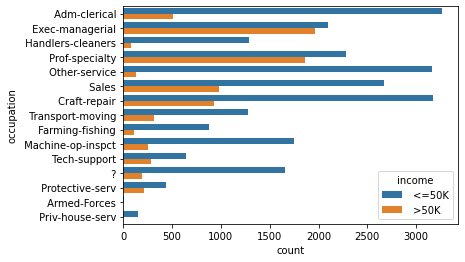

In [ ]:
#Plotting feature occupation
op = sns.countplot(data=df, y='occupation', hue='income')
df['occupation'].value_counts()

**Preprocessing feature 'occupation'**

This feature has 15 unique categories. We will try a reduction in categories by separating occupations into fewer classes:

* **class 'BlueCollar'**: occupations: Craft-repair, Farming-fishing, Handlers-cleaners, Machine-op-inspct.

Blue Collar jobs *may involve manufacturing, warehousing, mining, excavation, electricity generation and power plant operations,electrical construction and maintenance, custodial work, farming, commercial fishing, logging, landscaping, pest control, food processing, oil field work, waste collection and disposal, recycling, construction, maintenance. This does exclude driving, trucking and many other types of physical work.* (Source:Wikipedia)

* **class 'WhiteCollar'**: occupations: Exec-managerial, Adm-clerical, Prof-specialty

White-collar workers *include job paths related to government, consulting, academia, accountancy, business and executive management, 
              customer support, design, engineering, market research, finance, human resources, operations research, marketing, information technology, 
              networking, law, healthcare, architecture, and research and development.* (Source:Wikipedia)

* **class 'Services'**: occupations: Protective-Serv, Tech-Support,  Other-service, Priv-house-serv, Transport-moving


* **class 'Other_occupation'**: occupations: '?', Armed-Forces, Sales

After feature selection:
---------------------



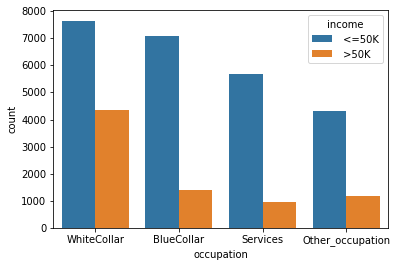

In [ ]:


X['occupation']=['BlueCollar' if (i == ' Craft-repair' or i == ' Farming-fishing' or i == ' Handlers-cleaners' or i == ' Machine-op-inspct')
else 'WhiteCollar' if (i==' Exec-managerial' or i==' Adm-clerical' or i==' Prof-specialty')
else 'Other_occupation' if (i==' ?' or i ==' Armed-Forces' or i==' Sales')
else 'Services' for i in df['occupation']]

dummy=pd.get_dummies(X.occupation)
X=pd.concat([X, dummy], axis=1)
print ('After feature selection:\n---------------------\n')
cp = sns.countplot(data=X, x='occupation', hue=df.income)
X.occupation.value_counts()
del X['occupation']

>>**Feature Native Country**


---------------------
After feature selection:
United-States    29170
Other_country     3391
Name: native-country, dtype: int64


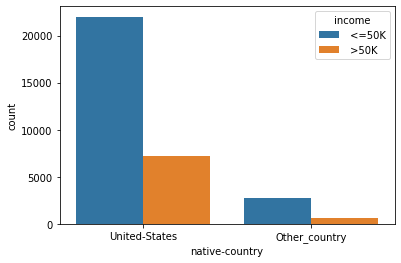

In [ ]:
# Analysing feature 'native-country'
#print (df['native-country'].value_counts()) 
#print (len(df[df['native-country']==' United-States'])/len(df)) #'United-States' accounts for 89.5% of the features, the rest 10.5% representing the other 41 features

#Separating feature 'native country' into 'United-States' and 'Other'
#
X['native-country']=['United-States' if i == ' United-States' else 'Other_country' for i in df['native-country']]

print ('\n---------------------\nAfter feature selection:')
print (X['native-country'].value_counts())

dummy=pd.get_dummies(X['native-country'])
X=pd.concat([X, dummy], axis=1)

cp = sns.countplot(data=X, x='native-country', hue=df.income)

del X['native-country']

>>**Features: Marital status, Relationship, Race, Sex**

**Protected attributes**

After feature selection:
---------------------



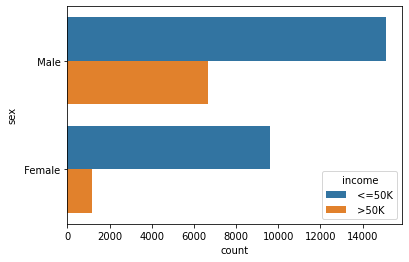

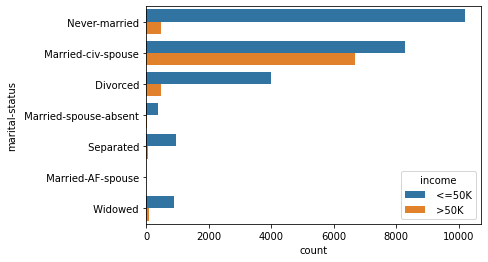

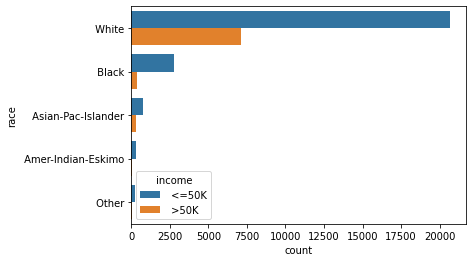

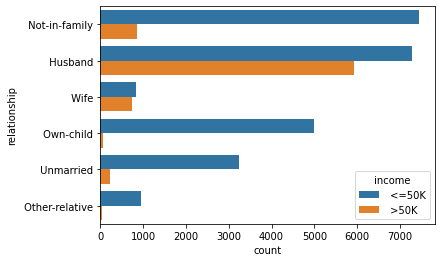

NP    17562
WP    14999
Name: marital-status, dtype: int64
 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64


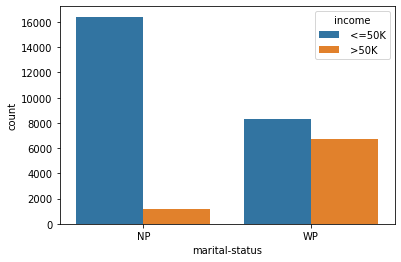

In [ ]:
protected=list() #list of protected attributes

print ('After feature selection:\n---------------------\n')
for i in ['sex','marital-status','race','relationship']:
  sns.countplot(data=df, y=i, hue=df.income)
  plt.show()

# Analizing feature 'marital status' ----------   Regrouping the feature into:
#with-partner ('WP'):  Married-civ-spouse,  Married-AF-spouse 
#no-partner ('NP): Never-married, Divorced, Separated, Widowed, Married-spouse-absent

#print (df['marital-status'].value_counts())
X['marital-status']=['WP' if (i == ' Married-civ-spouse' or i == ' Married-AF-spouse')
else 'NP' for i in df['marital-status']]
print (X['marital-status'].value_counts())
sns.countplot(data=X, x='marital-status', hue=df.income)
dummy=pd.get_dummies(X['marital-status'])
X=pd.concat([X, dummy], axis=1)
del X['marital-status']
protected.append('NP')
protected.append('WP')

# Analizing feature 'relationship' ------------- 
# Inspecting the histogram, it would make sense to group 'Husband' and 'Wife' together into 'Spouse' and the rest into 'Family-not-spouse',
#but it will definitely correlate with the feature 'marital-status'. Thus 'relationship' will be excluded from the features.
del X['relationship']
#print (df['relationship'].value_counts())
#dummy = pd.get_dummies(X.relationship)
#X = pd.concat([X, dummy], axis=1)

# Analizing feature 'race' 
print (df['race'].value_counts())
X['race']=['Other_race' if (i==' Other') else i for i in X.race]
dummy=pd.get_dummies(X.race)
X = pd.concat([X, dummy], axis=1)
del X['race']
protected.append('Other_race')
protected.append('White')
protected.append('Black')
protected.append('Asian-Pac-Islander')
protected.append('Amer-Indian-Eskimo')

# Analizing feature 'sex'
#print (df['sex'].value_counts())
dummy=pd.get_dummies(X.sex)
X = pd.concat([X, dummy], axis=1)
del X['sex']
protected.append('Female')
protected.append('Male')

In [ ]:
#Attributes describing X: list of numerical columns (list_num), list of binary columns (list_bin)
list_num=['age','education-num','net-capital', 'hours-per-week']
list_bin=[]
#Columns of X (checking the results of dummy function)
for i in X.columns:
  if i[0]==' ': #removing the space at the beginning of some of the column names
    X.rename(columns={i : i.replace(" ", "")}, inplace=True)
    print (i[1:])
    if (i not in list_num): list_bin.append(i[1:])
  else: 
    print (i)
    if (i not in list_num): list_bin.append(i)

print ('A total of ', X.shape[1], 'features')
print (list_bin)

age
education-num
hours-per-week
net-capital
Gov
Other_work
Private
Self-emp
BlueCollar
Other_occupation
Services
WhiteCollar
Other_country
United-States
NP
WP
Amer-Indian-Eskimo
Asian-Pac-Islander
Black
White
Other_race
Female
Male
A total of  23 features
['Gov', 'Other_work', 'Private', 'Self-emp', 'BlueCollar', 'Other_occupation', 'Services', 'WhiteCollar', 'Other_country', 'United-States', 'NP', 'WP', 'Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'White', 'Other_race', 'Female', 'Male']


 <=50K    24720
 >50K      7841
Name: income, dtype: int64

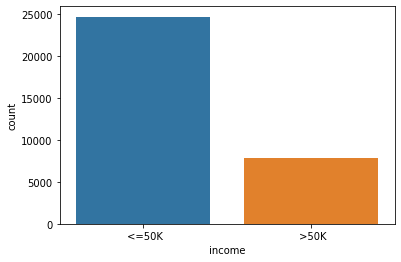

In [ ]:
#Income 

# showing distribution of income
# The label 'income' is very imbalanced, which could potentially affect the accuracy of the classifiers.

sns.countplot(data=df, x='income')
df['income'].value_counts()

> ● Bivariate analysis 

In what follows, a correlation matrix for the numerical values will be plotted, as well as a heatmap showing the Jaccard coefficient between the binomial features.

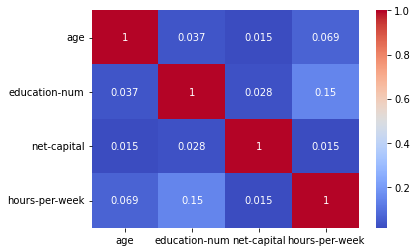

In [ ]:
# corelation matrix
corr_matrix = X.loc[:,list_num].corr()
corr_matrix

# alternative to corr_matrix: just use df.corr() and it will pick numerical values automatically. annot= for numbers, cmap= for colors
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")


Computing correlations between  occupation  and  workclass

Computing correlations between  occupation  and  native-country

Computing correlations between  occupation  and  race

Computing correlations between  occupation  and  sex

Computing correlations between  occupation  and  marital

Computing correlations between  workclass  and  native-country

Computing correlations between  workclass  and  race

Computing correlations between  workclass  and  sex

Computing correlations between  workclass  and  marital

Computing correlations between  native-country  and  race

Computing correlations between  native-country  and  sex

Computing correlations between  native-country  and  marital

Computing correlations between  race  and  sex

Computing correlations between  race  and  marital

Computing correlations between  sex  and  marital


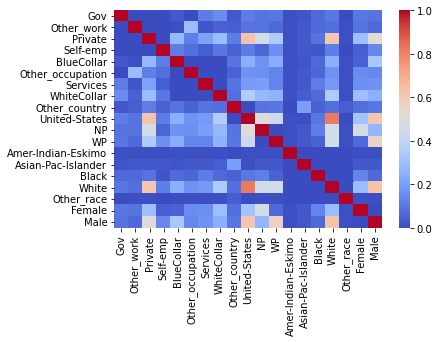

In [ ]:
#Printing a heatmap showing the jaccard coefficients between the columns of binary features in X:

#1. defining jaccard coefficient
def jaccard_coef (v1, v2):
    rs=0 # = r + s
    q=0
    for x,y in zip(v1,v2):
        if (x!=y): rs=rs+1
        if (x)&(y): q=q+1
    #smc=round(rs/(q+rs),2) #similarity coefficient rounded to 2 decimals
    jc=round(q/(q+rs),2) #jaccard coeficient rounded to 2 decimals
    return jc 

#2. Building lists of columns to analyse:
#print (list_bin) #OUT: ['Gov', 'Other_work', 'Private', 'Self-emp', 'BlueCollar', 'Other_occupation', 'Services', 
#                       'WhiteCollar', 'Other_country', 'United-States', 'NP', 'WP', 'Amer-Indian-Eskimo', 'Asian-Pac-Islander', 
#                        'Black', 'White', 'Other_race', 'Female', 'Male']

occupation=list_bin[0:4] #Values: ['Gov', 'Other_work', 'Private', 'Self-emp']
workclass=list_bin[4:8]  #Values: ['BlueCollar', 'Other_occupation', 'Services', 'WhiteCollar']
country=list_bin[8:10]   #Values: ['Other_country', 'United-States']
marital=list_bin[10:12]  #Values: ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'White', 'Other_race']
race=list_bin[12:17]     #Values: ['Female', 'Male']
sex=list_bin[17:19]      #Values: ['NP', 'WP']
list2=[occupation, workclass, country, race, sex, marital]
#List2 is a list of lists; 
#Reason: it makes no sense to check for correlation amongst different binary columns pertaining to the same feature, such as Other_Country vs United-States
#Example: list2[0] = occupation = ['Gov', 'Other_work', 'Private', 'Self-emp']
names=['occupation', 'workclass', 'native-country', 'race', 'sex', 'marital']


#3. Building up an array of results:
data=np.zeros([19,19])
results=pd.DataFrame(data=data, columns=list_bin)
results.index=list_bin
#results.head(10)


corr=[]
for i in range(len(list2)):     #example: in the first iteration i = occupation
  for j in range(len(list2)-i-1): #example: in the first iteraion of i, j takes the values: workclass, country, marital, race and sex
    correlation=False #We assume that the features are independent
    print ('\nComputing correlations between ',names[i],' and ', names[j+1+i])
    for v1 in list2[i]:  #example: in the first iteration of i, v1 takes the values 'Gov', 'Other_work', 'Private', 'Self-emp'
        for v2 in list2[j+i+1]:
          results[v1].loc[v2]= jaccard_coef(X[v1],X[v2])
          results[v2].loc[v1]= jaccard_coef(X[v1],X[v2]) #Due to simmetry

#Adding jaccard coef = 1 on the diagonal:
for i in list_bin:  #example: in the first iteration of i, v1 takes the values 'Gov', 'Other_work', 'Private', 'Self-emp'
      results[i].loc[i]=1 

sns.heatmap(results, cmap="coolwarm")

In [ ]:
for i in range(len(list2)):
  print (list2[i])

['Gov', 'Other_work', 'Private', 'Self-emp']
['BlueCollar', 'Other_occupation', 'Services', 'WhiteCollar']
['Other_country', 'United-States']
['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'White', 'Other_race']
['Female', 'Male']
['NP', 'WP']


#**K-Means**

##*Parameter Tuning*

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# function for figuring out a useful number of clusters

def elbowcurve(x, y, z):
  Nc = range(x, y, z)
  kmeans = [KMeans(n_clusters=i) for i in Nc]
  kmeans
  score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
  score
  plt.plot(Nc,score)
  plt.xlabel('Number of Clusters')
  plt.ylabel('Score')
  plt.title('Elbow Curve')
  plt.show()

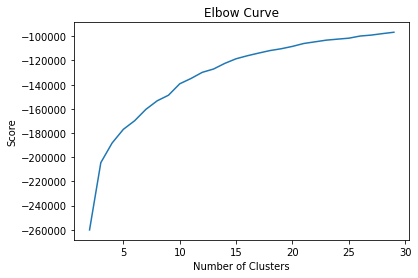

In [ ]:
elbowcurve(2,30,1)

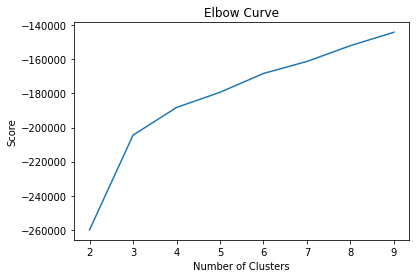

In [ ]:
elbowcurve(2,10,1)
# 3 is cut-off of the elbow curve

In [ ]:
# elbowcurve(5,100,10)

In [ ]:
# testing out different initations
inits = ['k-means++', 'random']

kmeans = [KMeans(n_clusters=2, init=i) for i in inits]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

for val, s in zip(inits, score):
  print(f'The score for initiation with {val} is {round(s, 4)}.')

The score for initiation with k-means++ is -260054.5558.
The score for initiation with random is -260054.5558.


In [ ]:
# testing out different tolerances
tols = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]

kmeans = [KMeans(n_clusters=2, tol=i) for i in tols]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

for val, s in zip(tols, score):
  print(f'The score for tolerance value of {val} is {round(s, 4)}.')

The score for tolerance value of 1 is -260074.2297.
The score for tolerance value of 0.1 is -260058.1373.
The score for tolerance value of 0.01 is -260062.2438.
The score for tolerance value of 0.001 is -260054.8924.
The score for tolerance value of 0.0001 is -260054.5558.
The score for tolerance value of 1e-05 is -260054.4918.
The score for tolerance value of 1e-06 is -260054.4309.


In [ ]:
# testing different algorithms
algs = ['full', 'elkan']

kmeans = [KMeans(n_clusters=2, algorithm=i) for i in algs]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

for val, s in zip(algs, score):
  print(f'The score for the algorithm "{val}" is {round(s, 4)}.')

The score for the algorithm "full" is -260054.5558.
The score for the algorithm "elkan" is -260054.5558.


In [ ]:
# testing different max_iter
iters = [1, 2, 5, 10, 50, 100, 200, 300, 400, 500]

kmeans = [KMeans(n_clusters=2, max_iter=i) for i in iters]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

for val, s in zip(iters, score):
  print(f'The score for {val} max iterations is {round(s, 4)}.')

The score for 1 max iterations is -260086.8982.
The score for 2 max iterations is -260079.111.
The score for 5 max iterations is -260054.7815.
The score for 10 max iterations is -260054.5251.
The score for 50 max iterations is -260054.5558.
The score for 100 max iterations is -260054.4996.
The score for 200 max iterations is -260054.5558.
The score for 300 max iterations is -260054.5558.
The score for 400 max iterations is -260054.5558.
The score for 500 max iterations is -260054.5336.


In [ ]:
# testing different initiation amounts
n_inits = [1,2, 5, 10, 15, 20]

kmeans = [KMeans(n_clusters=2, n_init=i) for i in n_inits]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

for val, s in zip(n_inits, score):
  print(f'The score for {val} initiations is {round(s, 4)}.')

The score for 1 initiations is -260054.5558.
The score for 2 initiations is -260054.5626.
The score for 5 initiations is -260054.5714.
The score for 10 initiations is -260054.4478.
The score for 15 initiations is -260054.5558.
The score for 20 initiations is -260054.5558.


**Conclusion of Parameter Tuning**:


The only way to considerably increase the performance is to increase the amount of clusters. This however could lead to overfitting of clustering algorithm to the data set and makes evaluation in a human comprehensible way difficult. All other parameters tweaks result in only minimally increased performances in comparison to the base parameters and will therefore not be included in the final model.


##*Final Model*

The used parameters are the following:
- n_clusters = 2
- init = 'k-means++'
- n_init = 10
- max_iter = 300
- tol = 1e-4
- random_state = 1

In [ ]:
kM_final = KMeans(n_clusters=2, random_state=1)
kM_final.fit(X)

y_pred = kM_final.labels_.tolist()

##*Evaluation measures*

###**External**

In [ ]:
# https://datascienceparichay.com/article/get-accuracy-of-predictions-in-python-with-sklearn/

def compute_accuracy(y_true, y_pred):
    correct = 0
    # iterate over each label and check
    for true, pred in zip(y_true, y_pred):
        if true == pred:
            correct += 1
    # compute the accuracy
    accuracy = correct/len(y_true)
    return accuracy

In [ ]:
# very low accuracy in most cases. Random state couldn't fix this
print(compute_accuracy(y, y_pred))

0.7224900955130371


In [ ]:
# checking the predictions against the actual labels
print('Actual labels:')
print(0, y.count(0))
print(1, y.count(1))

print('Predicted clusters:')
print(0, y_pred.count(0))
print(1, y_pred.count(1))

# in most cases, the clusters are flipped

Actual labels:
0 24720
1 7841
Predicted clusters:
0 22328
1 10233


In [ ]:
# flip cluster labels and check accuracy again
y_pred = [1 if entry == 0 else 0 for entry in y_pred]
print(compute_accuracy(y, y_pred))

0.27750990448696294


In [ ]:
# checking different values depending on TP/FP/TN/FN
from sklearn.metrics import precision_recall_fscore_support

scores = precision_recall_fscore_support(y, y_pred, average='macro')
metrics = ['Precision', 'Recall', 'F-Score']

for string, value in zip(metrics, scores):
  print(f'{string}: {value}')

# if the results are below 0.5, the cluster labels have to be flipped again in the previous cell. this also affects the outcome of the protected attributes

Precision: 0.3535856613636067
Recall: 0.32740965875579736
F-Score: 0.27358969860074256


###**Internal**

Silhouette coefficient
(How tightly are clusters grouped)
--> 0.7 is strong strcuture, >0.5 is usable

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

silhouette_score(X, y_pred)

0.32565033835990154

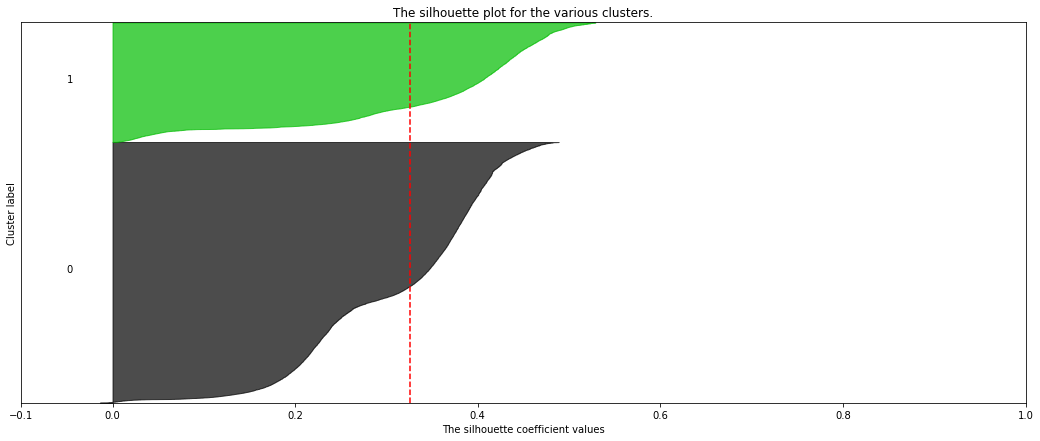

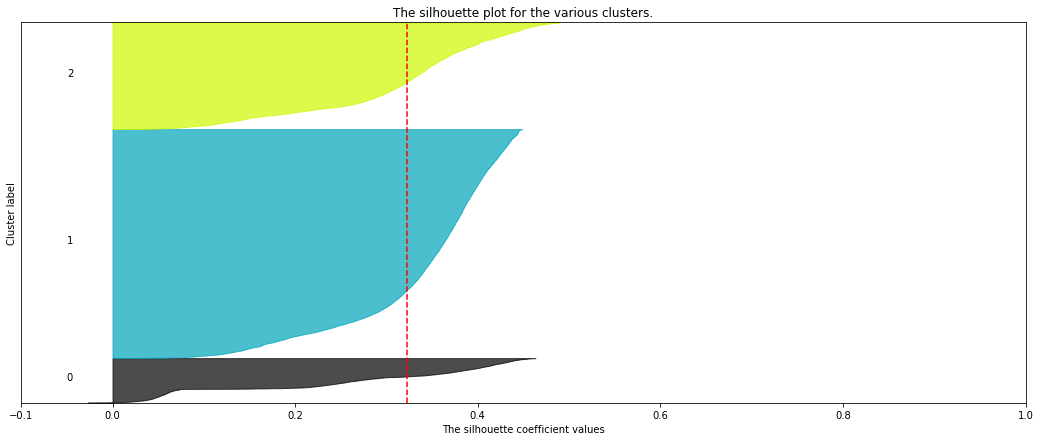

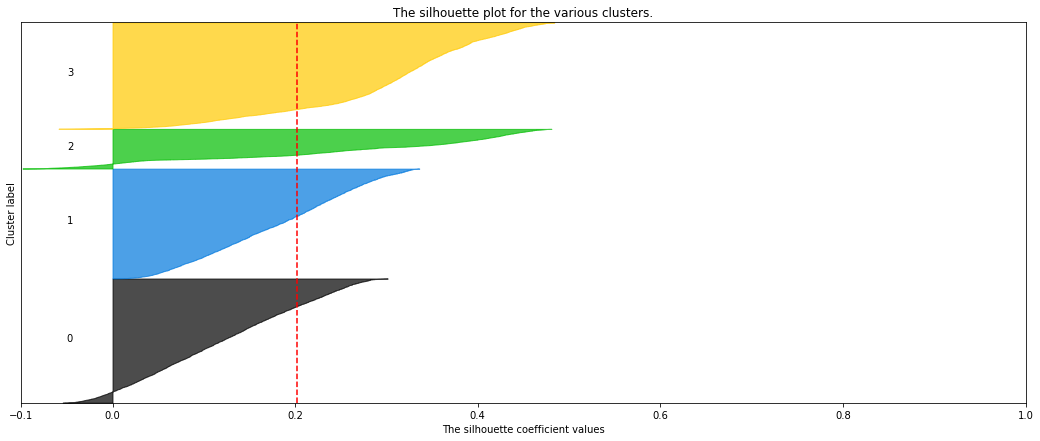

In [ ]:
# adjusted from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
import matplotlib.cm as cm

for n_clusters in range(2,5):
    # Create a subplot with 1 row and 1 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 1 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(X)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    silhouette_avg = silhouette_score(X, cluster_labels)
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

##*Human comprehensive labelling of clusters*

The choice of the value two for the kMeans algorithm is supported by two reasons:

1. The Silhouette plot for kMeans with n_clusters=2 has the highest similarity between cluster shapes and the average Silhouette coefficient decreases with increasing amounts of clusters.
2. Comparison between the labelled data set and the clustering results is easier achieved if there are only two clusters.

The two clusters being fairly similar to the labels of the original data set (72% overlap) suggest that this algorithm also groups the instances of the data set by income ('high-income'/'low-income') or a related metric. It is not apparent whether the cut-off is exactly an income of 50k per year but it could be a similar amount. It would probably be smaller due to the fact that the 'high-income' cluster contains more instances than the label >50k.

##*Protected Atributes*

In [ ]:
# creating data set containing only female/male instances and the income feature
def dist_population(X, y):
  data = pd.DataFrame(columns=['F','income'])
  data['F'] = X['Female']
  data['M'] = X['Male']
  data['income'] = y

  female_population = data[data['F']==1]
  male_population = data[data['M']==1]

  return female_population, male_population

In [ ]:
# returns chances of an female/male instance belonging to income class/cluster 1
def dist_prob_inc(X, y):
  F, M=dist_population(X,y)
  return len(F[F.income==1])/len(F), len(M[M.income==1])/len(M) 
  # returning the probability of outcome 1 if given female, and prob of outcome 1 if given male

In [ ]:
# getting imbalance for the actual labels
print ('The probability of income > 50K in the data:')
a, b = dist_prob_inc (X, y)
print ('  if sex=Female : p_f = {:.3%} ; if sex=Male : p_m= {:.3%}'.format(a, b))
print(f'Statistical parity (bias of the data set) = p_f / p_m = {round(a/b,2)}' )

The probability of income > 50K in the data:
  if sex=Female : p_f = 10.946% ; if sex=Male : p_m= 30.574%
Statistical parity (bias of the data set) = p_f / p_m = 0.36


In [ ]:
# getting imbalance for the predicted clusters
print ('The probability of belonging to cluster 1 in the processed data:')
a, b = dist_prob_inc (X, y_pred)
print ('  if sex=Female : p_f = {:.3%} ; if sex=Male : p_m= {:.3%}'.format(a, b))
print(f'Statistical parity (bias of the clustering) = p_f / p_m = {round(a/b,2)}' )

The probability of belonging to cluster 1 in the processed data:
  if sex=Female : p_f = 71.145% ; if sex=Male : p_m= 67.302%
Statistical parity (bias of the clustering) = p_f / p_m = 1.06


In [ ]:
# Testing impact of parameter tolerance

tolerances = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]


clustering = [KMeans(n_clusters=2, tol=tol, random_state=1) for tol in tolerances]
clustering = [cls.fit(X) for cls in clustering]
y_all = [cls.labels_.tolist() for cls in clustering]

for ys in y_all:
  a, b = dist_prob_inc (X, ys)
  # ensure that the smaller cluster is used as cluster 1
  if a > 0.50:
    a = 1 - a
    b = 1 - b
  print ('  if sex=Female : p_f = {:.3%} ; if sex=Male : p_m= {:.3%}'.format(a, b))
  print(f'Statistical parity (bias of the data set) = p_f / p_m = {round(a/b,2)}' )

  if sex=Female : p_f = 28.744% ; if sex=Male : p_m= 32.524%
Statistical parity (bias of the data set) = p_f / p_m = 0.88
  if sex=Female : p_f = 29.069% ; if sex=Male : p_m= 32.855%
Statistical parity (bias of the data set) = p_f / p_m = 0.88
  if sex=Female : p_f = 29.069% ; if sex=Male : p_m= 32.855%
Statistical parity (bias of the data set) = p_f / p_m = 0.88
  if sex=Female : p_f = 29.022% ; if sex=Male : p_m= 32.827%
Statistical parity (bias of the data set) = p_f / p_m = 0.88
  if sex=Female : p_f = 28.855% ; if sex=Male : p_m= 32.698%
Statistical parity (bias of the data set) = p_f / p_m = 0.88
  if sex=Female : p_f = 28.874% ; if sex=Male : p_m= 32.712%
Statistical parity (bias of the data set) = p_f / p_m = 0.88
  if sex=Female : p_f = 28.883% ; if sex=Male : p_m= 32.735%
Statistical parity (bias of the data set) = p_f / p_m = 0.88


**Conclusion of Protected Attribute**: 

The kMeans algorithm seems to be less biased towards the classification of women in comparison to the original labels. In the original set, only about 1/10 women and 3/10 men belonged to '>50k'. After clustering it was about 3/10 for both women and men in the 'high-income' cluster. The impact of parameter variation (tolerance) is minimal. Although it seems to be a little more pronounced as its impact on the overall clustering accuracy.

# **Hierarchical Clustering**

## Searching for the parameters that provide the best accuracy

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:

def testing_linkage (link, aff):
  cluster = AgglomerativeClustering(n_clusters=2, affinity=aff, linkage=link) #linkage{‘ward’, ‘complete’, ‘average’, ‘single’},
  cluster.fit(X)
  acc=compute_accuracy (y, cluster.labels_)
  return acc, cluster.labels_



linkages=['ward','complete','average','single']

#The variable **resulting_y** will record all resulting clustering from the tests, such that after selecting one with a high enough accuracy, 
#we don't have to run it yet again to analyse its results.
#As such, resulting_y of 0, 1, 2 and 3 will have respectivelly ward, complete, average and single linkage calculated using euclidean distances,
#whereas resulting_y of 4, 5 and 6 will have the linkages complete, average and single using manhattan distances (ward method can only work with euclidean distances).


resulting_y={}
count=0
print ('Affinity = euclidean')
for i in linkages:
  acc, resulting_y[count]=testing_linkage(i, 'euclidean')
  print ('     Accuracy for method ' , i, ' is ', acc)
  count=count+1
  
linkages=linkages[1:]
print ('Affinity = manhattan')
for i in linkages:
  acc, resulting_y[count]=testing_linkage(i, 'manhattan')
  print ('     Accuracy for method ' , i, ' is ', acc)
  count=count+1



Affinity = euclidean
     Accuracy for method  ward  is  0.7173919719910322
     Accuracy for method  complete  is  0.7640735849636068
     Accuracy for method  average  is  0.7640735849636068
     Accuracy for method  single  is  0.7640735849636068
Affinity = manhattan
     Accuracy for method  complete  is  0.28736832406867113
     Accuracy for method  average  is  0.7640735849636068
     Accuracy for method  single  is  0.7592211541414575


We chose the metric=euclidean, linkage=average, which corresponds to the labels stored in resulting_y[2]

##Internal measures for hierarchical clustering: visualisation with dendrograms

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_matrix=linkage(X, method='average', metric='euclidean')

In [ ]:
%%script echo skipping  
#Skipped due to long processing time


#Plotting the dendogram with all the original data points results in an unintelligible plot, due to the high number of leafs.
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix,
                orientation='top',
                labels=y,  #because we want to see how the true labels were clustered
                show_leaf_counts=True)
plt.show()



skipping


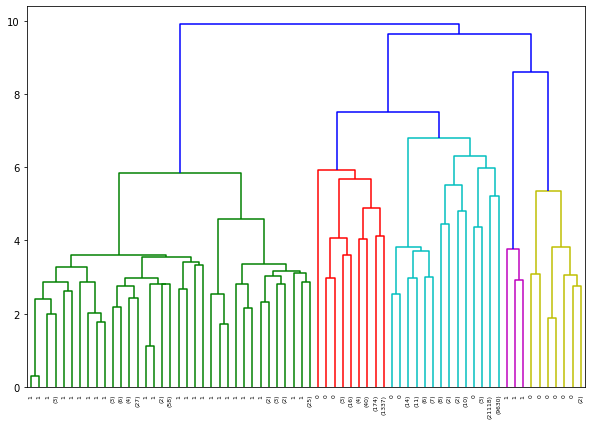

In [ ]:
#Plotting a truncated dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix,
                orientation='top',
                labels=y,   #because we want to see how the true labels were clustered
                truncate_mode='level', p=6)
plt.show()

##**External**

In [ ]:
print ('The accuracy of the hierarchical clustering algorithm is', compute_accuracy(y, resulting_y[2]))

The accuracy of the hierarchical clustering algorithm is 0.7640735849636068


In [ ]:
# checking different values depending on TP/FP/TN/FN
from sklearn.metrics import precision_recall_fscore_support

scores = precision_recall_fscore_support(y, resulting_y[2], average='macro')
metrics = ['Precision', 'Recall', 'F-Score']

for string, value in zip(metrics, scores):
  print(f'{string}: {value}')


Precision: 0.8814579346953892
Recall: 0.51013901288101
F-Score: 0.45263295665417874


## *Protected attributes*

In [ ]:
y_pred=resulting_y[0]

In [ ]:
# getting imbalance for the actual labels
print ('The probability of income > 50K in the data:')
a, b = dist_prob_inc (X, y)
print ('  if sex=Female : p_f = {:.3%} ; if sex=Male : p_m= {:.3%}'.format(a, b))
print(f'Statistical parity (bias of the data set) = p_f / p_m = {round(a/b,2)}' )

The probability of income > 50K in the data:
  if sex=Female : p_f = 10.946% ; if sex=Male : p_m= 30.574%
Statistical parity (bias of the data set) = p_f / p_m = 0.36


In [ ]:
# getting imbalance for the predicted clusters
print ('The probability of belonging to cluster 1 in the processed data:')
a, b = dist_prob_inc (X, y_pred)
print ('  if sex=Female : p_f = {:.3%} ; if sex=Male : p_m= {:.3%}'.format(a, b))
print(f'Statistical parity (bias of the clustering) = p_f / p_m = {round(a/b,2)}' )

The probability of belonging to cluster 1 in the processed data:
  if sex=Female : p_f = 29.849% ; if sex=Male : p_m= 34.511%
Statistical parity (bias of the clustering) = p_f / p_m = 0.86
